<a href="https://colab.research.google.com/github/S-AILAB/Student-Performance-Factors-DataViz.-/blob/main/Student_Performance_Factors_(DataViz_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connecting with Kaggle and getting data

In [ ]:
!pip install kaggle

In [ ]:
import os
import json

# Create Kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json to the directory
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [ ]:
!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 49.9MB/s]


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Unzipping the dataset file

In [ ]:
import zipfile

with zipfile.ZipFile('student-performance-factors.zip', 'r') as zip_ref:
    zip_ref.extractall('student-performance-factors')

#Importing Libraries

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#About data
**Describing Data:**


This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.


#Reading the data

In [ ]:
import pandas as pd

# Adjust the filename if necessary
df = pd.read_csv('/content/student-performance-factors/StudentPerformanceFactors.csv')



#Showing Data

In [ ]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
df.tail(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6597,16,91,High,Medium,Yes,6,72,High,Yes,0,High,High,Public,Negative,2,No,Postgraduate,Near,Female,70
6598,9,87,Low,Medium,Yes,6,64,Medium,Yes,1,High,Medium,Public,Neutral,2,No,High School,Near,Female,64
6599,30,94,Medium,Low,No,5,52,Low,No,3,High,Medium,Private,Neutral,2,No,Postgraduate,Moderate,Female,70
6600,12,98,Medium,Low,Yes,4,54,Medium,Yes,2,Medium,High,Private,Neutral,3,No,High School,Near,Female,67
6601,20,83,Medium,Low,No,6,51,Low,Yes,2,Medium,Medium,Public,Neutral,4,No,High School,Moderate,Female,65
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


#Understanding Data




In [ ]:
df.shape

(6607, 20)

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [ ]:
#Finding Duplicate
print("Duplicate Rows in the dataset are:", df.duplicated().sum())

Duplicate Rows in the dataset are: 0


#Treating missing value

In [ ]:
df.isnull().sum().T.sort_values(ascending=False)

,0
Hours_Studied,0
Attendance,0
Gender,0
Distance_from_Home,0
Parental_Education_Level,0
Learning_Disabilities,0
Physical_Activity,0
Peer_Influence,0
School_Type,0
Teacher_Quality,0


In [ ]:
#filling the missing values in the column
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0],inplace=True)

In [ ]:
#checking for the nulls
df.isnull().sum().T.sort_values(ascending=False)

,0
Hours_Studied,0
Attendance,0
Gender,0
Distance_from_Home,0
Parental_Education_Level,0
Learning_Disabilities,0
Physical_Activity,0
Peer_Influence,0
School_Type,0
Teacher_Quality,0


#Separating Categorical & Numerical Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
num_data = df.select_dtypes(include='number')
cat_data = df.select_dtypes(include='object')

print("Numerical Data:")
print(num_data.columns)

print("\nCategorical Data:")
print(cat_data.columns)

Numerical Data:
Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

Categorical Data:
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


# Data Visualization

Text(0, 0.5, 'Exams_Score')

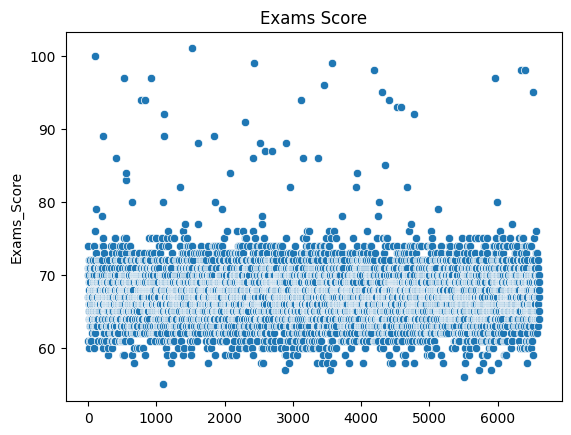

In [ ]:
sns.scatterplot(data =df['Exam_Score'])
plt.title('Exams Score')
plt.ylabel('Exams_Score')

Histogram

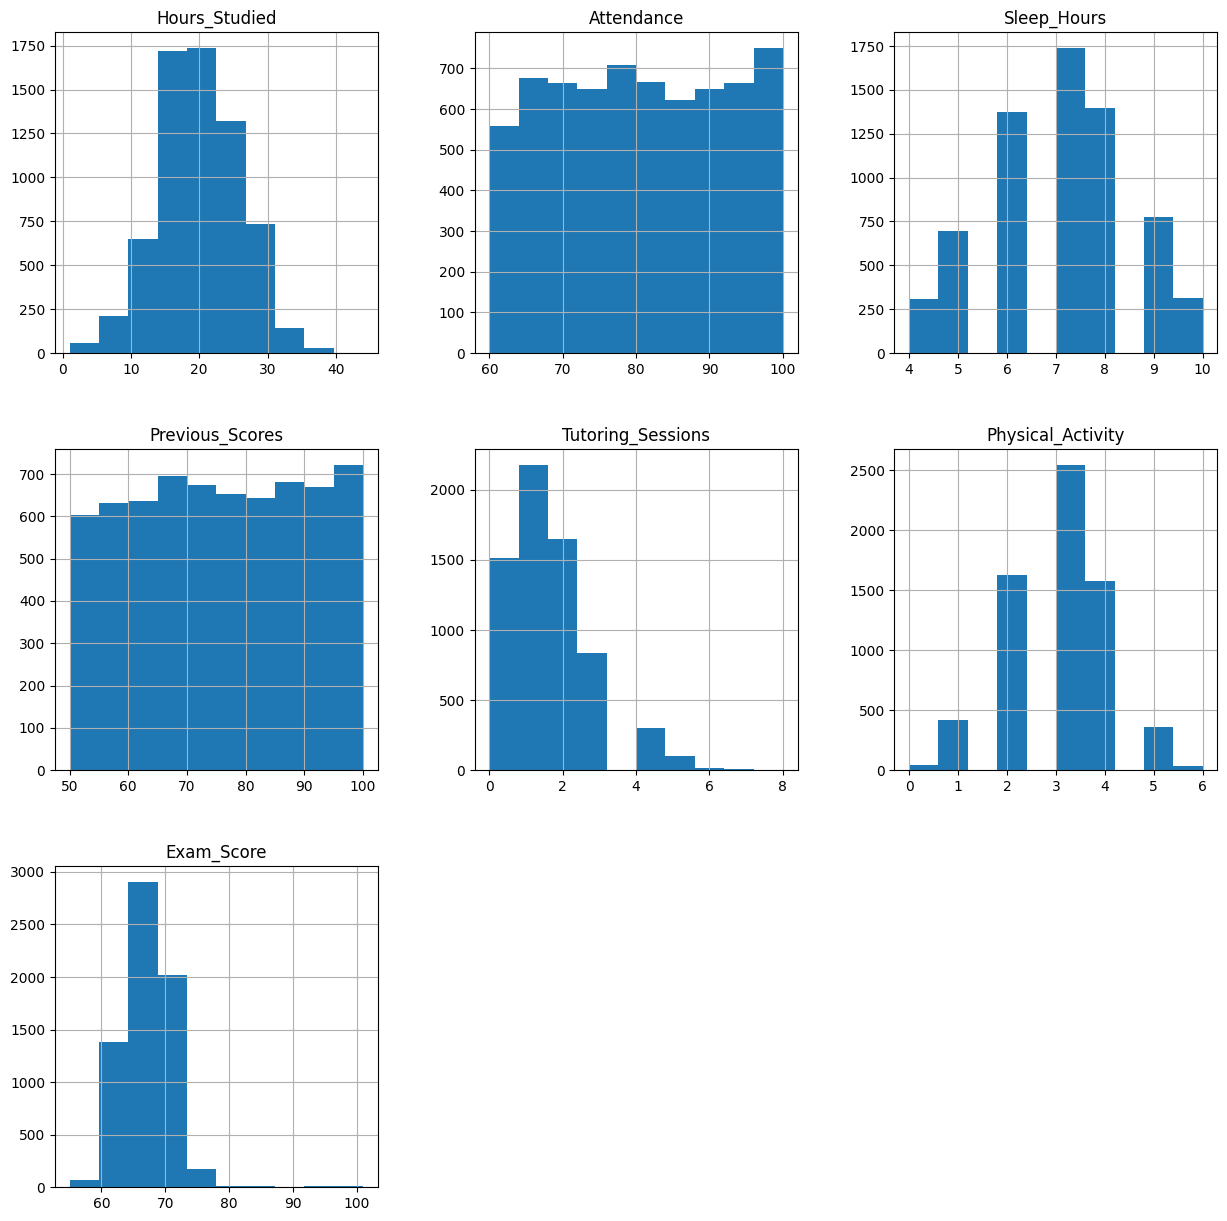

In [ ]:
df.hist(figsize=(15,15))
plt.show()

BOXPLOT for numerical data

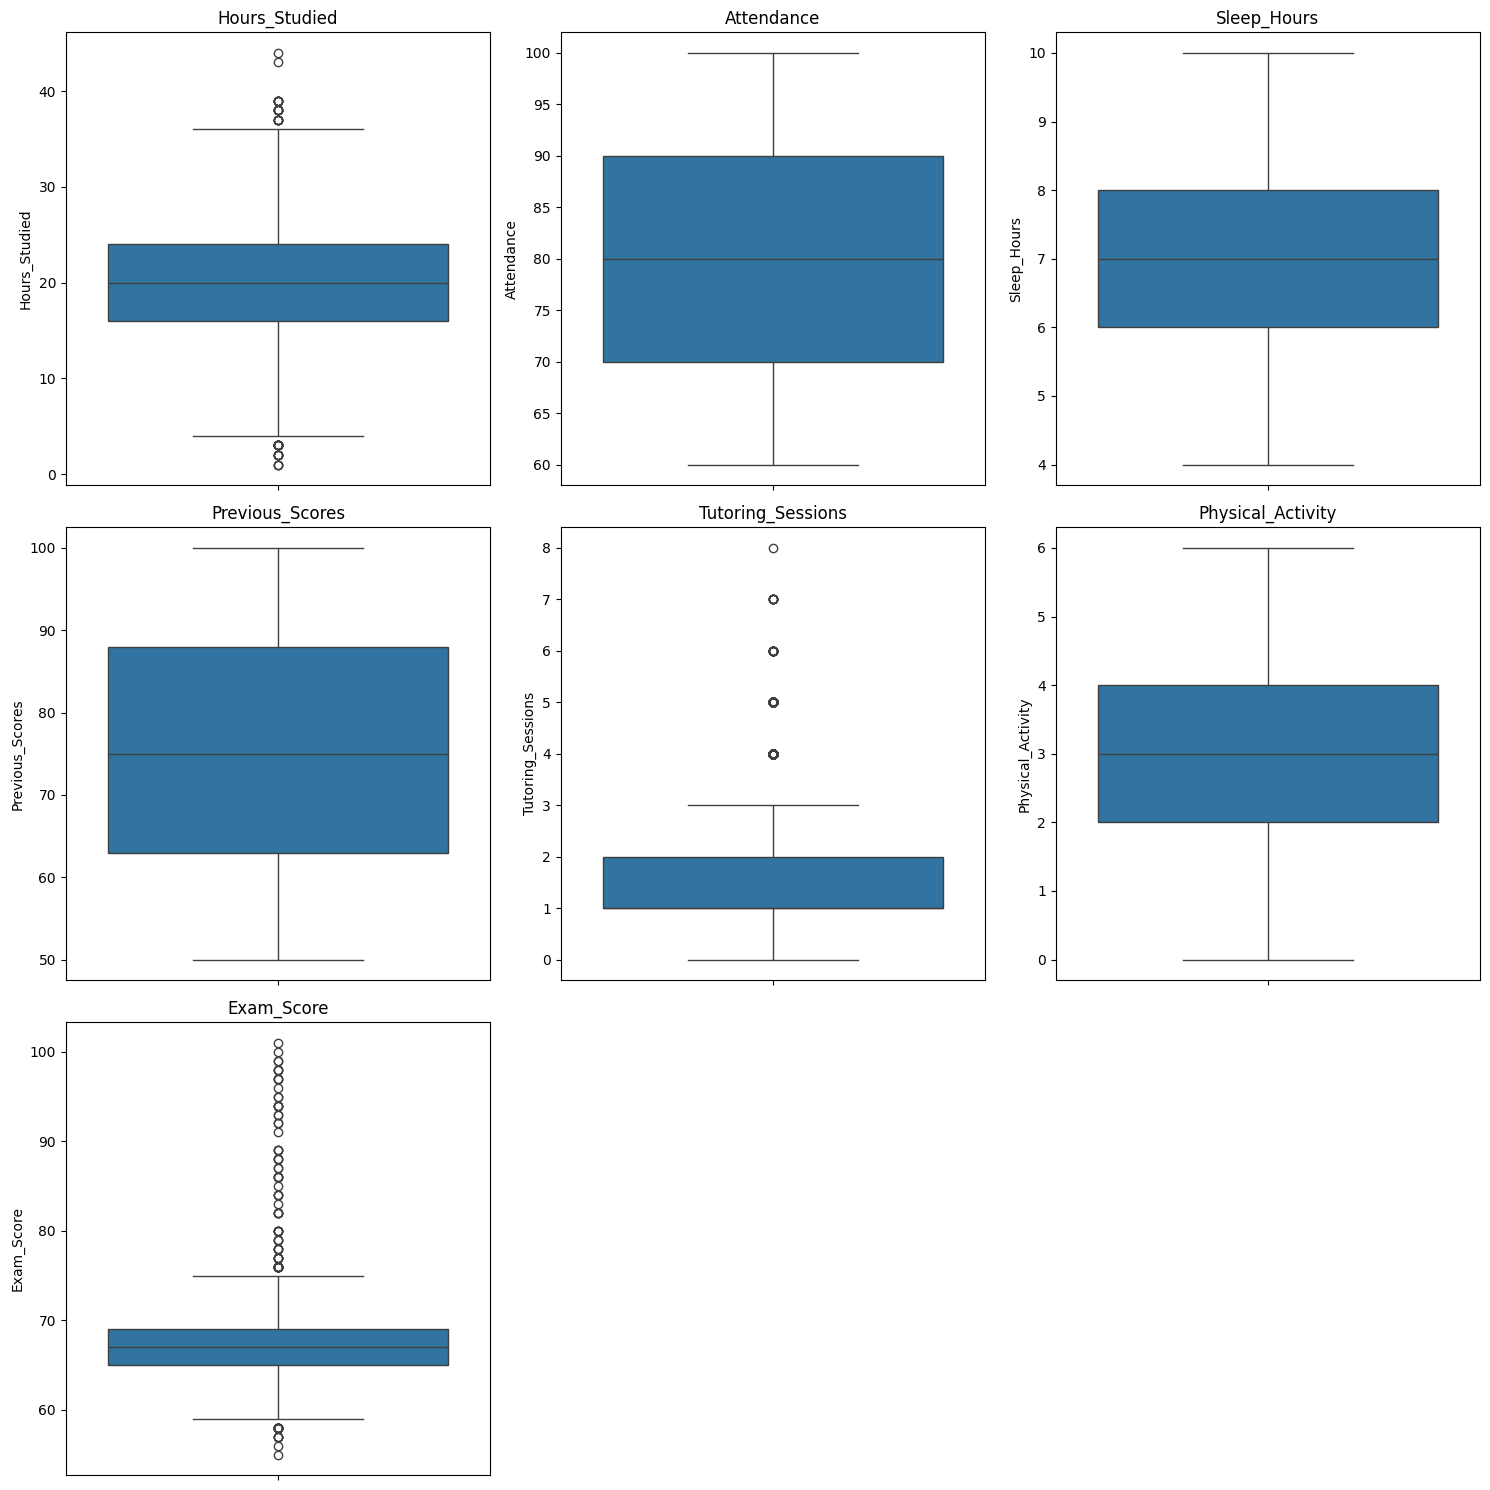

In [ ]:
plt.figure(figsize=(15,15))
num_plots = len(num_data.columns)
num_rows = (num_plots + 2) // 3  # Determine number of rows needed
for i in range(num_plots):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data=df[num_data.columns[i]])
    plt.title(num_data.columns[i])
plt.tight_layout()  # To avoid overlap
plt.show()

Pie Chart for Categorical Data

In [ ]:
for cols in cat_data:
  values = cat_data[cols].value_counts()
  fig =px.pie(names=values.index, values=values, title=f'{cols}')
  fig.update_layout(title_font_size=15)
  fig.show()

Creating correlation between Exam Scores and all the Categorical Variable

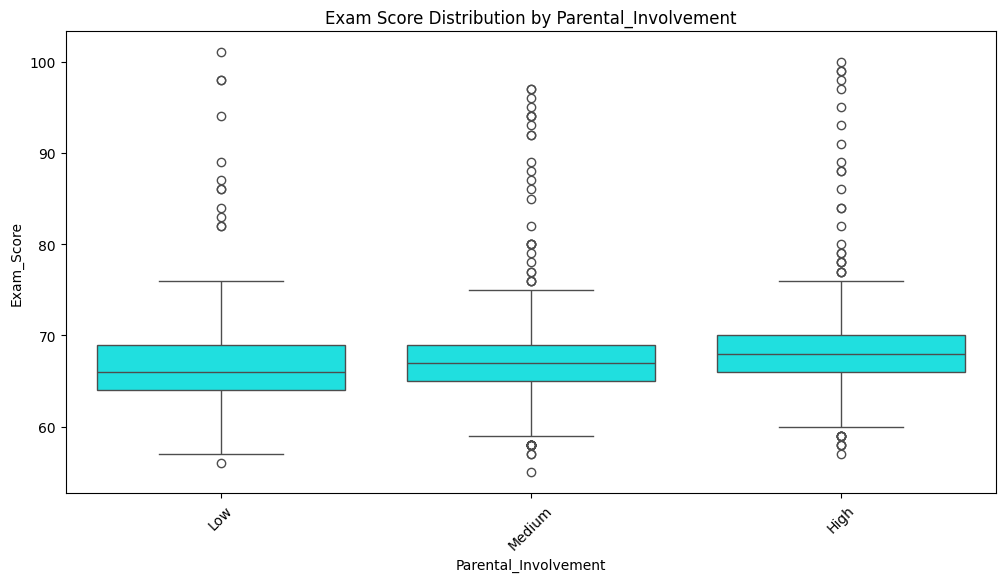

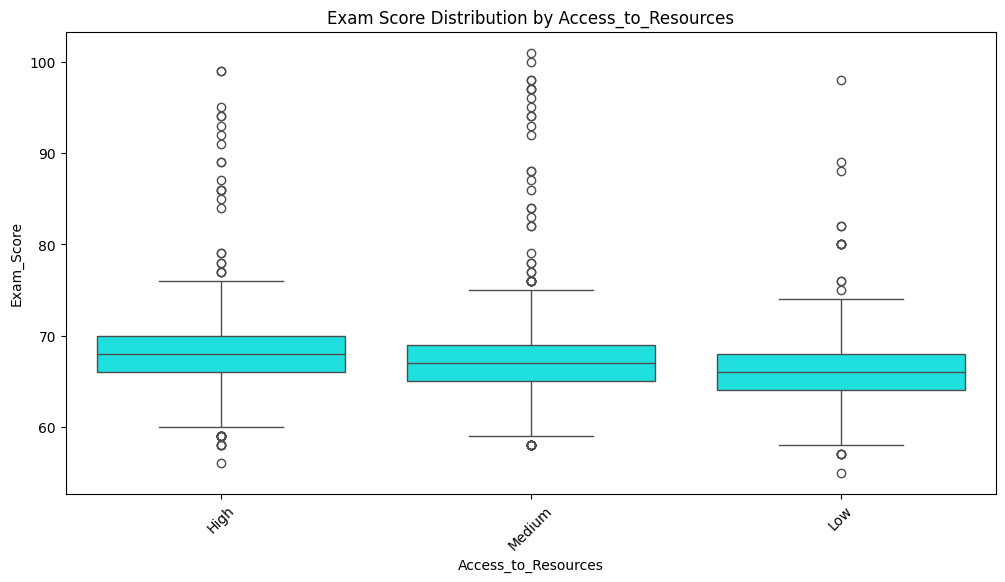

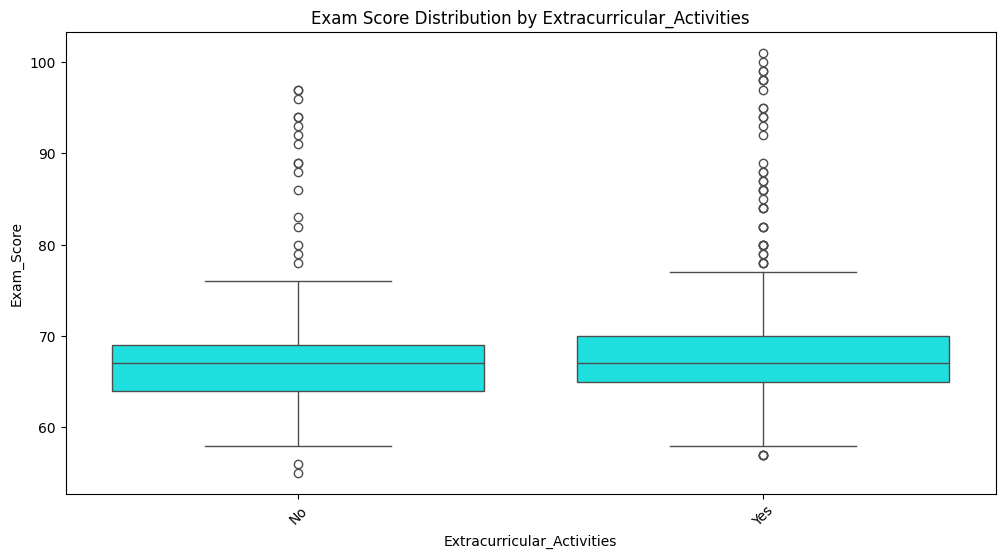

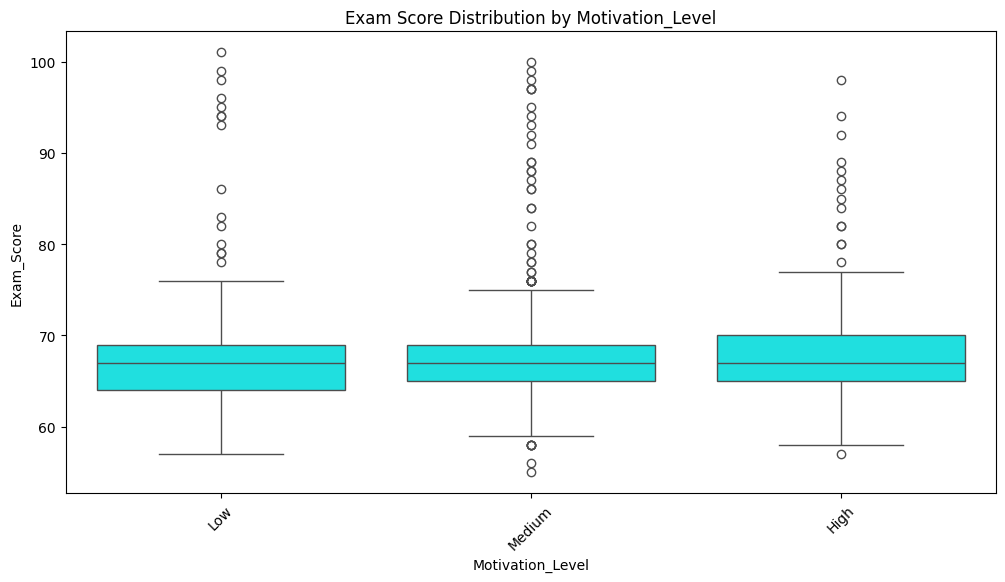

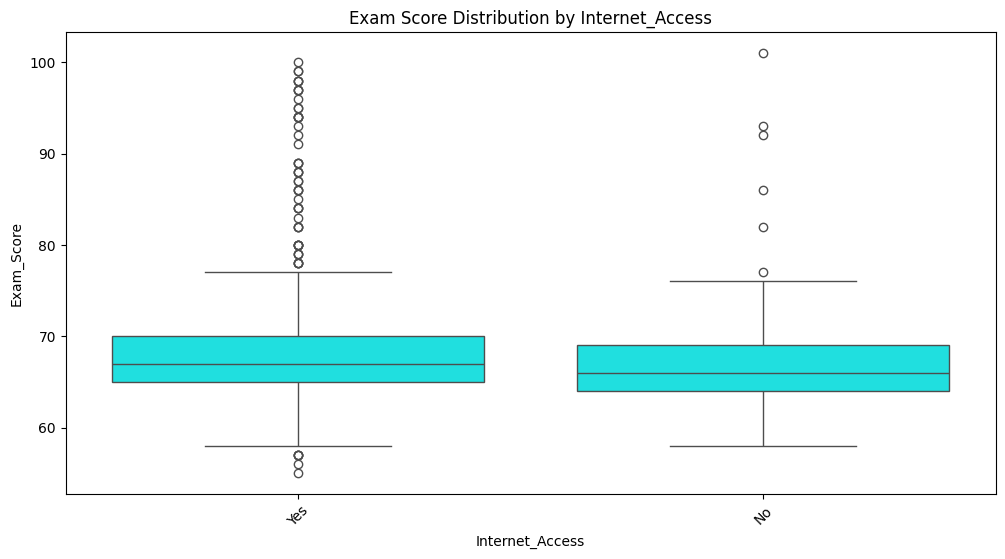

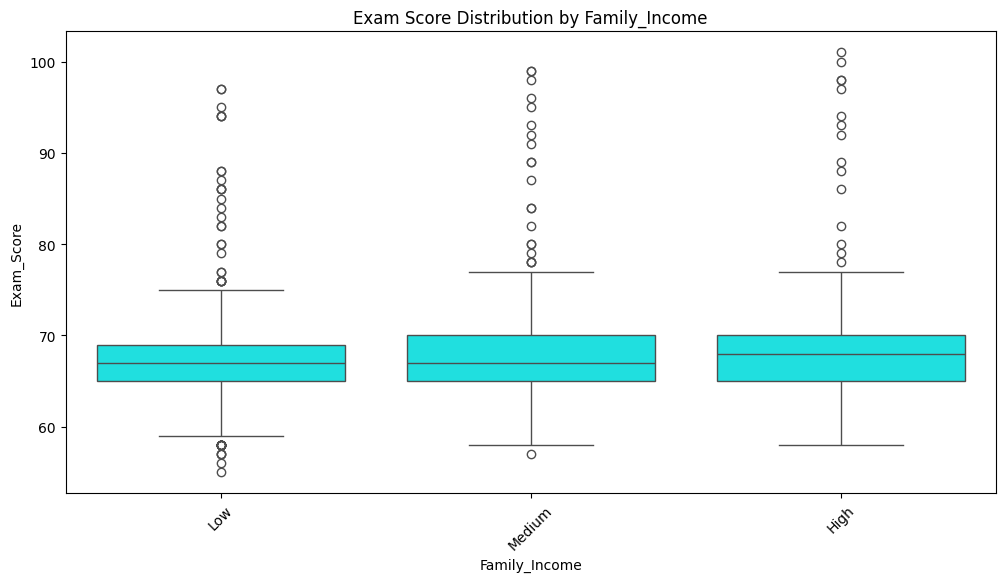

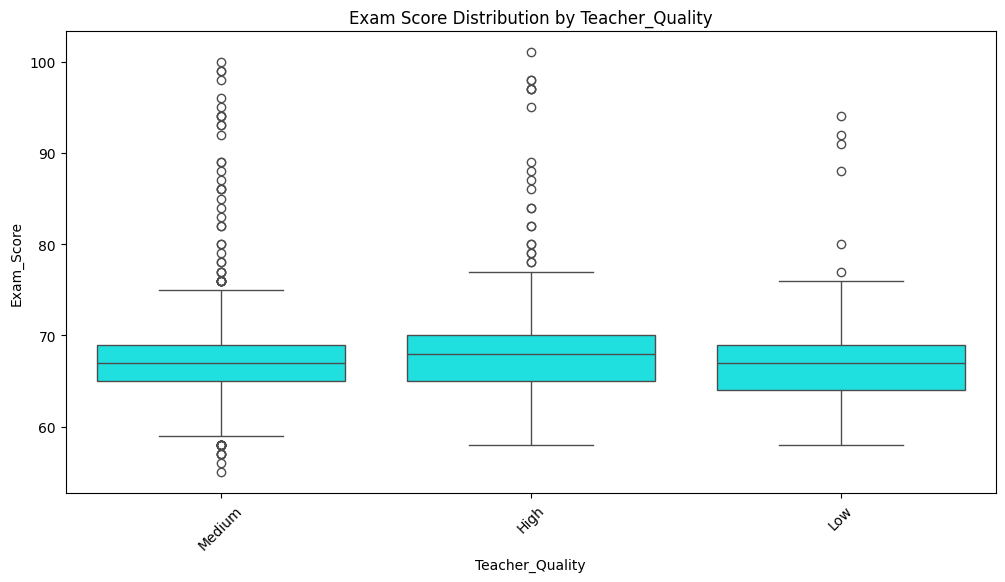

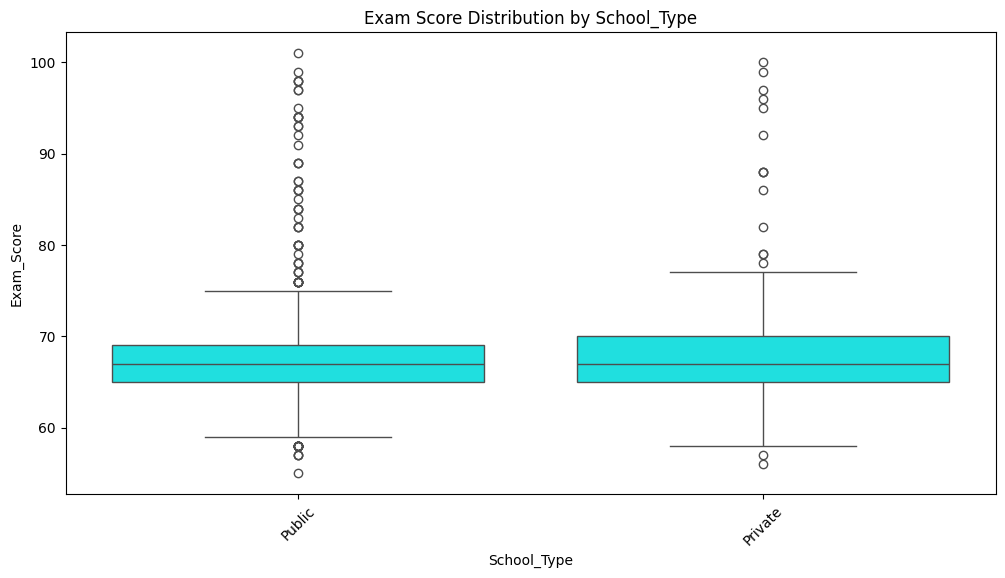

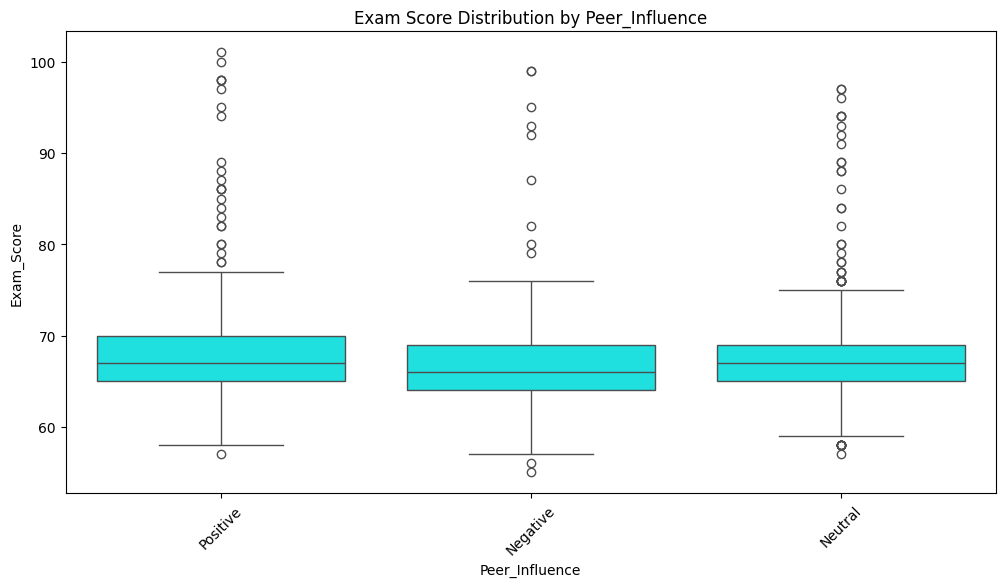

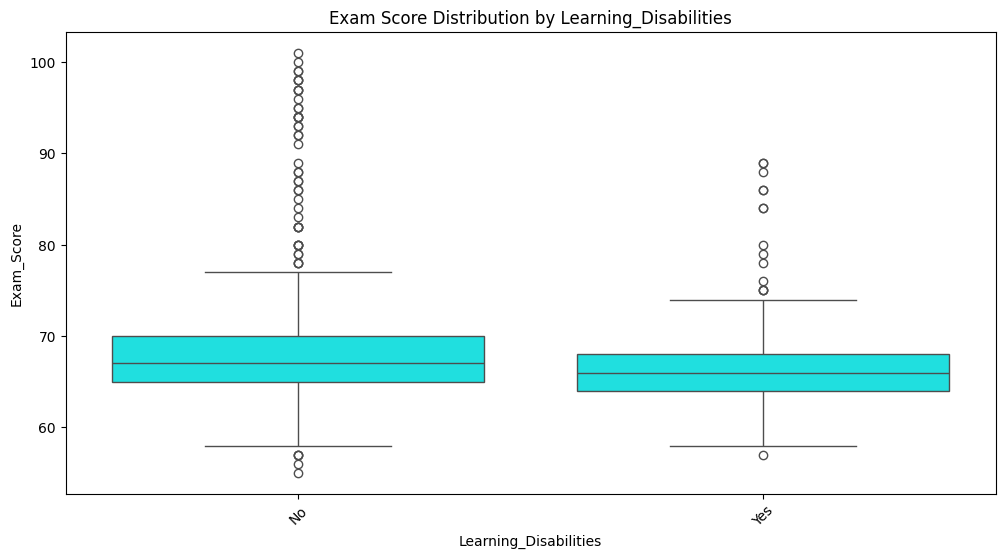

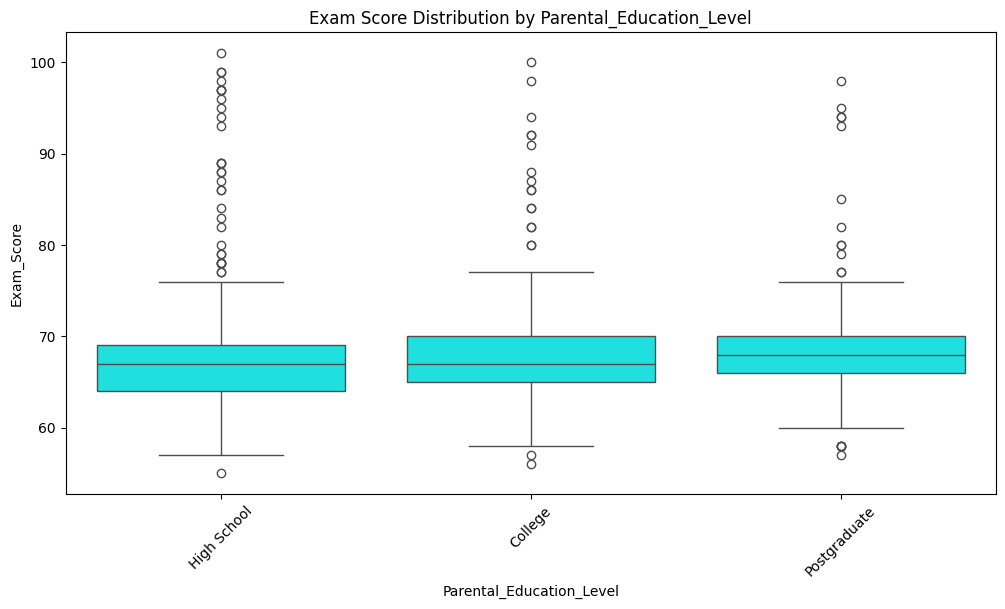

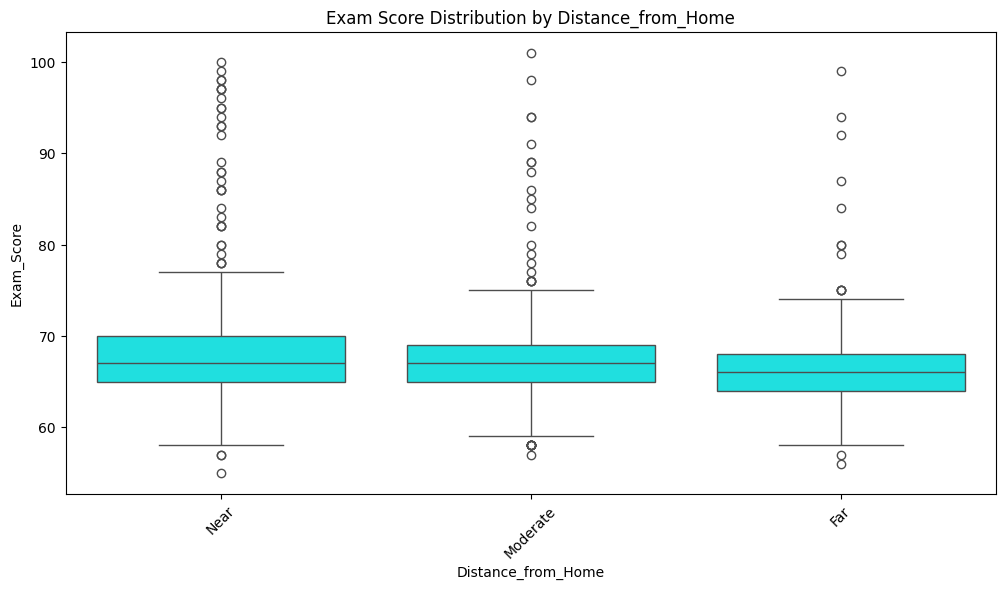

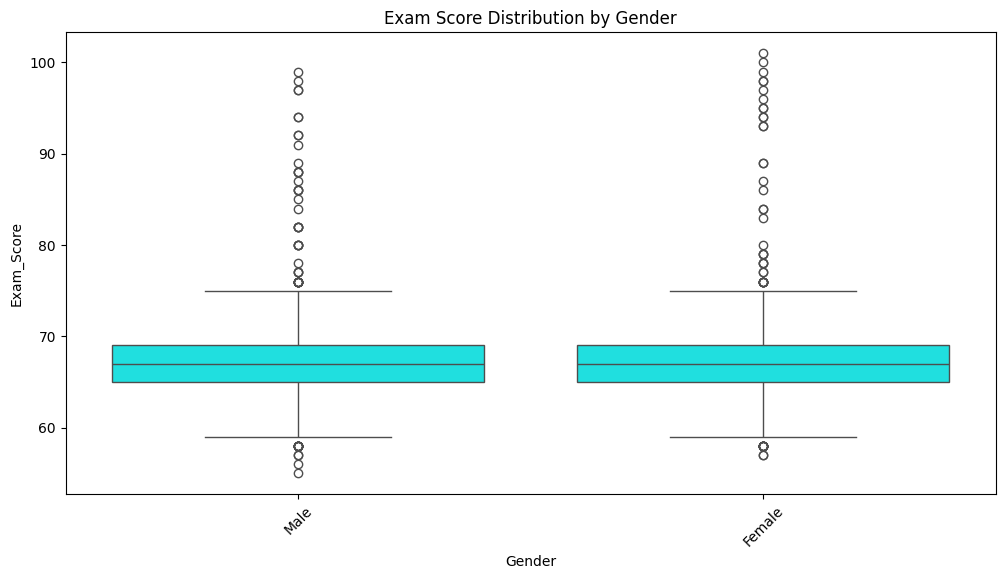

In [ ]:
for i in cat_data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=i, y='Exam_Score', data=df, color='cyan')
    plt.title(f'Exam Score Distribution by {i}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()

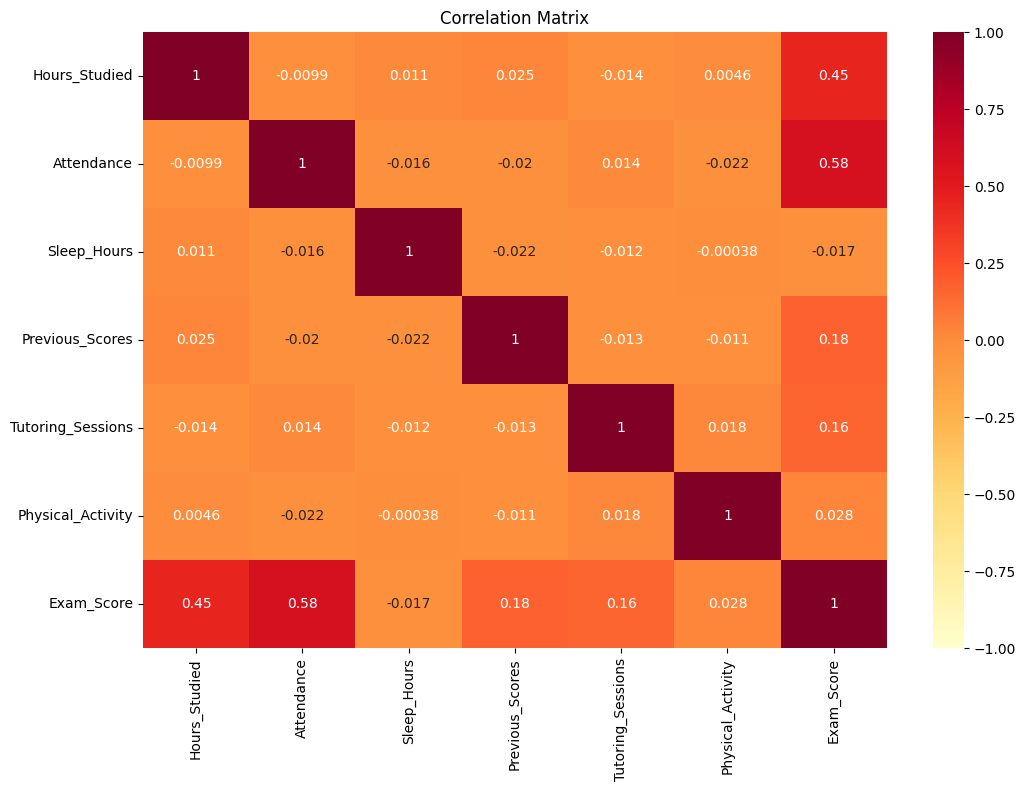

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(num_data.corr(), annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#Data transformation

In [ ]:
dummy_data = pd.get_dummies(cat_data, drop_first=True)
dummy_data

,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_Low,Motivation_Level_Medium,Internet_Access_Yes,Family_Income_Low,Family_Income_Medium,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,True,False,False,False,False,True,False,True,True,False,...,True,True,False,True,False,True,False,False,True,True
1,True,False,False,True,False,True,False,True,False,True,...,True,True,False,False,False,False,False,True,False,False
2,False,True,False,True,True,False,True,True,False,True,...,True,True,True,False,False,False,True,False,True,True
3,True,False,False,True,True,False,True,True,False,True,...,True,True,False,False,False,True,False,True,False,True
4,False,True,False,True,True,False,True,True,False,True,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,False,False,False,True,False,False,True,True,False,False,...,True,True,False,True,False,True,False,False,True,False
6603,False,False,False,True,False,False,True,True,True,False,...,False,True,False,True,False,True,False,False,True,False
6604,False,True,True,False,True,True,False,True,True,False,...,True,True,False,False,False,False,True,False,True,False
6605,False,False,False,False,True,False,False,True,True,False,...,True,False,False,True,False,True,False,False,False,False


Concating the data

In [ ]:
combined_data = pd.concat([num_data, dummy_data], axis=1)
combined_data

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,False,False,False,...,True,True,False,True,False,True,False,False,True,False
6603,23,76,8,81,3,2,69,False,False,False,...,False,True,False,True,False,True,False,False,True,False
6604,20,90,6,65,3,2,68,False,True,True,...,True,True,False,False,False,False,True,False,True,False
6605,10,86,6,91,2,3,68,False,False,False,...,True,False,False,True,False,True,False,False,False,False


In [ ]:
print(combined_data.head())

   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  Exam_Score  Parental_Involvement_Low  \
0                  3          67                      True   
1                  4          61                      True   
2                  4          74                     False   
3                  4          71                      True   
4                  4          70                     False   

   Parental_Involvement_Medium  Access_to_Resources_Low  ...  \
0                        False                    False  ...   
1           

In [ ]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6607 non-null   int64
 1   Attendance                             6607 non-null   int64
 2   Sleep_Hours                            6607 non-null   int64
 3   Previous_Scores                        6607 non-null   int64
 4   Tutoring_Sessions                      6607 non-null   int64
 5   Physical_Activity                      6607 non-null   int64
 6   Exam_Score                             6607 non-null   int64
 7   Parental_Involvement_Low               6607 non-null   bool 
 8   Parental_Involvement_Medium            6607 non-null   bool 
 9   Access_to_Resources_Low                6607 non-null   bool 
 10  Access_to_Resources_Medium             6607 non-null   bool 
 11  Extracurricular_Activities_Yes

Splitting the data

In [ ]:
x=combined_data.drop('Exam_Score',axis=1)
y=combined_data['Exam_Score']

In [ ]:
print(y)

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(4955, 27)
(1652, 27)


#Modelling

*LinearRegression*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score (R²): ",lr.score(x_train,y_train))
print("test_score (R²): ",lr.score(x_test,y_test))

mean_squared_error:  4.6880862150145175
train_score (R²):  0.7368014941907014
test_score (R²):  0.6982173448475391


*RandomForest*

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score (R²): ",rf.score(x_train,y_train))
print("test_score (R²): ",rf.score(x_test,y_test))

mean_squared_error:  6.250950423728814
train_score (R²):  0.9462497998821278
test_score (R²):  0.5976122601888967


*XGB*

In [ ]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score (R²): ",xgb.score(x_train,y_train))
print("test_score (R²): ",xgb.score(x_test,y_test))

mean_squared_error:  5.9778938284010446
train_score (R²):  0.9817371091531832
test_score (R²):  0.6151895274501069


**Analysis:**

**MSE:** Lower is better. Linear Regression has the lowest MSE, indicating it has the smallest average squared difference between predicted and actual values.

**Test Score (R2):** Higher is better. Linear Regression has the highest test score, indicating it explains the most variance in the test set compared to the other models

**Summary:**

Based on the matrix:

**Linear Regression** has lowest MSE and highest test R2 score. Therefore it is the **best performing model** in comparison to **Random Forest** (where perfomrs bad on test set indication overfitting) and **XGB** (high training score but its test score is not significantly better than Random Forest).

# Models comparison

In [ ]:
acc=[]
names=['LinearRegression','RandomForest','XGB']
acc.extend([lr.score(x_test,y_test),rf.score(x_test,y_test),xgb.score(x_test,y_test)])
acc

[0.6982173448475391, 0.5982638889358014, 0.6151895274501069]

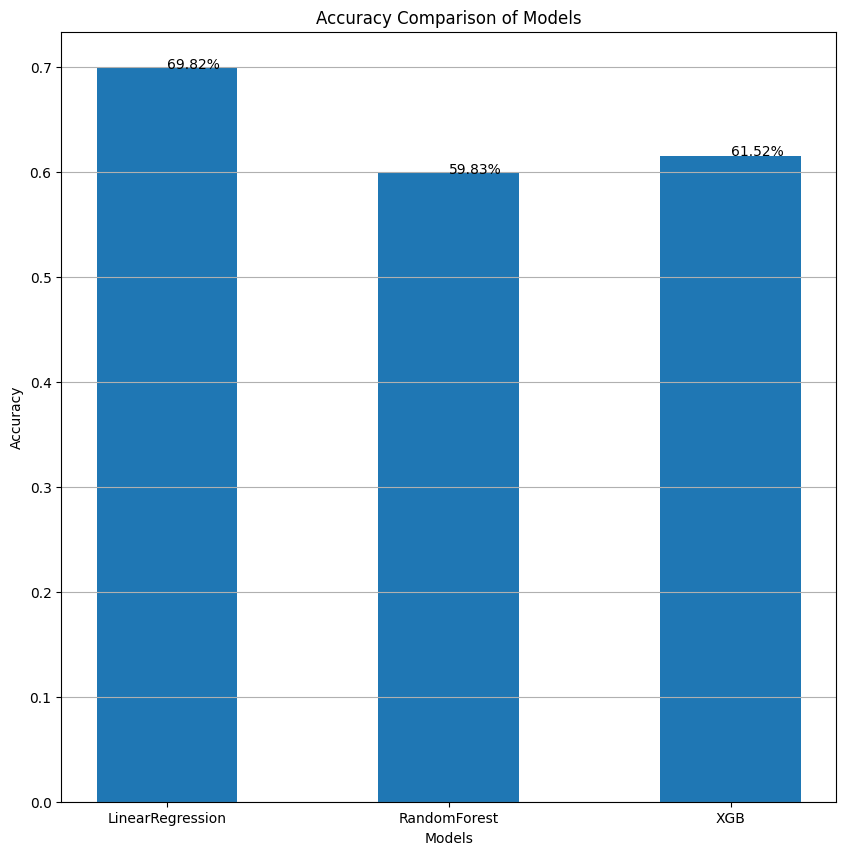

In [ ]:
plt.figure(figsize =(10,10))

plt.bar(names,acc,width = 0.5)
plt.title("Accuracy Comparison of Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid(axis='y')
for i, value in enumerate(acc):
    plt.text(i, value , f'{value*100:.2f}%')